### Digit Recognizer

---
Kaggle competition | Link: https://www.kaggle.com/c/digit-recognizer/overview

#### Import necessary modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

#### Load and prepare the data

In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As we can see, apart from **label**, dataset has $784$ more columns, which represnets pixle values of an $28$ x $28$ image.

Let's create `X_train` and `y_train` from `train`.

In [0]:
y_train = train['label']
X_train = train.drop(['label'], axis=1)

It's time for some normalization and reshaping.

In [0]:
X_train /= 255.0
test /= 255.0

In [0]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

Now, as we are ready with our data, it's time for defining and fitting a model. But before that, let's visualize what we have.

#### Visualization

Following function plots $12$ images from the dataset in a $3$ x $4$ grid. Title of each image represents its corresponding label.

In [0]:
def plot(data, labels, title='Label'):
    plt.figure(figsize=(10, 9))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(data[i][:,:,0])
        plt.title('{}: {}'.format(title, labels[i]))
        plt.axis('off');

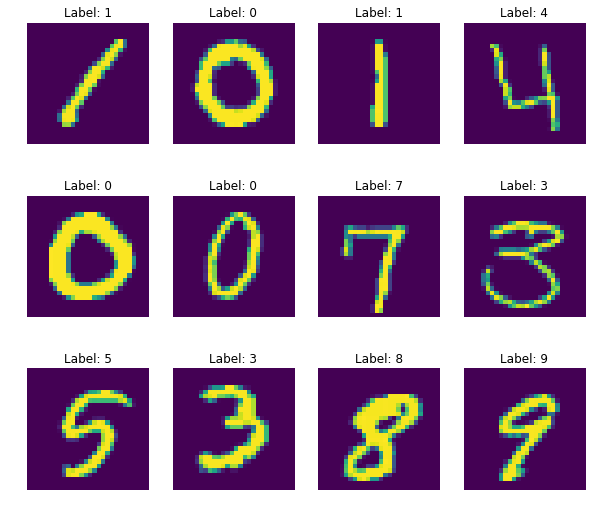

In [8]:
plot(X_train, y_train)

#### Define the model

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding = 'Same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu', padding = 'Same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

W0901 16:42:33.077652 140621963966336 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

#### Fit the model

In [0]:
EPOCHS = 5

In [13]:
%%time
history = model.fit(X_train, y_train.values,
                   validation_split=.1,
                   epochs=EPOCHS, batch_size=64,
                   verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 - 50s - loss: 0.2101 - acc: 0.9348 - val_loss: 0.0523 - val_acc: 0.9845
Epoch 2/5
37800/37800 - 49s - loss: 0.0521 - acc: 0.9838 - val_loss: 0.0582 - val_acc: 0.9826
Epoch 3/5
37800/37800 - 49s - loss: 0.0366 - acc: 0.9887 - val_loss: 0.0379 - val_acc: 0.9886
Epoch 4/5
37800/37800 - 49s - loss: 0.0282 - acc: 0.9911 - val_loss: 0.0556 - val_acc: 0.9833
Epoch 5/5
37800/37800 - 49s - loss: 0.0214 - acc: 0.9926 - val_loss: 0.0224 - val_acc: 0.9924
CPU times: user 7min 48s, sys: 7.16 s, total: 7min 55s
Wall time: 4min 8s


Plot Accuracy vs. Loss!

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(EPOCHS)

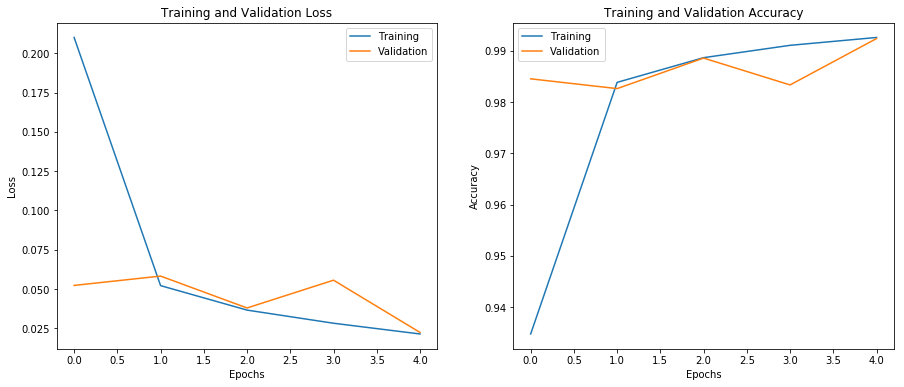

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

#### Make predictions

In [17]:
%%time
results = model.predict(test)

CPU times: user 19.7 s, sys: 331 ms, total: 20 s
Wall time: 10.7 s


In [0]:
results = np.argmax(results, axis=1)

Let's see some of our predictions.

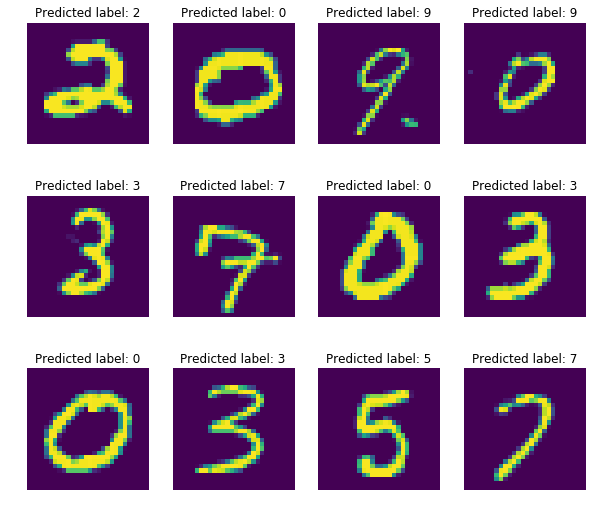

In [19]:
plot(test, results, 'Predicted label')

#### Export predictions

Convert `results` to **Pandas Series**.

In [0]:
results = pd.Series(results, name='Label')

In [0]:
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results], axis=1)

In [0]:
submission.to_csv('digit_recognizer.csv', index=False)